# PyTorch Tutorial: Artificial Neural Networks (ANNs)

## Welcome to PyTorch!

This comprehensive tutorial will teach you how to build, train, and evaluate Artificial Neural Networks using **PyTorch**.

### Learning Objectives

By the end of this notebook, you will be able to:
- Understand PyTorch tensors and basic operations
- Build neural network models using `nn.Module`
- Implement custom training and evaluation loops
- Use DataLoader for efficient data handling
- Train models for classification and regression tasks
- Apply regularization and optimization techniques
- Save and load trained models

### Prerequisites
- Basic Python knowledge
- Understanding of basic machine learning concepts
- NumPy fundamentals (helpful)

Let's dive in! 🔥

---
## Section 1: Introduction & Setup

First, let's import libraries and check our PyTorch installation.

In [1]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Core libraries imported successfully!")

Core libraries imported successfully!


In [3]:
# Import PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  # This enables access to various algorithms (e.g., SGD, Adam) to update neural network weights based on computed gradients, minimizing loss during training
from torch.utils.data import DataLoader, TensorDataset

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else
                     'mps' if torch.backends.mps.is_available() else 'cpu')
print(f"Using device: {device}")

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

print("\n✓ PyTorch is ready to use!")

PyTorch version: 2.9.0+cpu
Using device: cpu

✓ PyTorch is ready to use!


### Understanding PyTorch

**PyTorch** is a deep learning framework developed by Facebook (Meta). Key features:

- 🎯 **Dynamic computation graphs** - Build graphs on-the-fly
- 🔥 **Pythonic** - Feels like native Python
- 🚀 **GPU acceleration** - Easy to move models to GPU
- 📊 **Autograd** - Automatic differentiation
- 🏗️ **Flexible** - Great for research and production

**PyTorch vs Keras:**
- PyTorch: More explicit, lower-level control
- Keras: More abstract, easier for beginners
- Both are excellent! Choose based on your needs

In [4]:
# Quick device information
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
elif device.type == 'mps':
    print("Using Apple Metal Performance Shaders (MPS)")
else:
    print("Using CPU - GPU not available")
    print("💡 CPU is fine for learning! All code will work.")

Using CPU - GPU not available
💡 CPU is fine for learning! All code will work.


---
## Section 2: Tensor Basics

**Tensors** are the fundamental data structure in PyTorch (like NumPy arrays but with GPU support).

In [5]:
# Creating tensors - different methods

# From Python list
tensor_from_list = torch.tensor([[1, 2], [3, 4]]) # A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.
print("From list:")
print(tensor_from_list)

# Zeros and ones
zeros = torch.zeros(2, 3)
ones = torch.ones(2, 3)
print("\nZeros:\n", zeros)
print("\nOnes:\n", ones)

# Random tensors
rand_tensor = torch.rand(2, 3)  # Uniform [0, 1)
randn_tensor = torch.randn(2, 3)  # Normal distribution
print("\nRandom (uniform):\n", rand_tensor)
print("\nRandom (normal):\n", randn_tensor)

From list:
tensor([[1, 2],
        [3, 4]])

Zeros:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random (uniform):
 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

Random (normal):
 tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])


In [6]:
# Tensor attributes
x = torch.randn(3, 4)

print(f"Tensor: \n{x}")
print(f"\nShape: {x.shape}")
print(f"Size: {x.size()}")
print(f"Dtype: {x.dtype}")
print(f"Device: {x.device}")
print(f"Requires grad: {x.requires_grad}") # requires_grad=False in PyTorch means a tensor (or model parameter) is "frozen" or locked, telling the engine not to calculate gradients (derivatives) for it during backpropagation

Tensor: 
tensor([[ 0.3930,  0.4327, -1.3627,  1.3564],
        [ 0.6688, -0.7077, -0.3267, -0.2788],
        [-0.4220, -1.3323, -0.3639,  0.1513]])

Shape: torch.Size([3, 4])
Size: torch.Size([3, 4])
Dtype: torch.float32
Device: cpu
Requires grad: False


In [7]:
# Tensor operations
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print("a:", a)
print("b:", b)
print("\nOperations:")
print("a + b =", a + b)
print("a * b =", a * b)  # Element-wise
print("a @ b =", a @ b)  # Dot product
print("a.sum() =", a.sum())
print("a.mean() =", a.mean())
print("a.max() =", a.max())

a: tensor([1., 2., 3.])
b: tensor([4., 5., 6.])

Operations:
a + b = tensor([5., 7., 9.])
a * b = tensor([ 4., 10., 18.])
a @ b = tensor(32.)
a.sum() = tensor(6.)
a.mean() = tensor(2.)
a.max() = tensor(3.)


In [8]:
# Reshaping and indexing
x = torch.arange(12)  # [0, 1, 2, ..., 11]
print("Original:", x)

# Reshape to 3x4
x_reshaped = x.view(3, 4)
print("\nReshaped (3x4):\n", x_reshaped)

# Indexing
print("\nFirst row:", x_reshaped[0])
print("First column:", x_reshaped[:, 0])
print("Element [1, 2]:", x_reshaped[1, 2])

Original: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Reshaped (3x4):
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

First row: tensor([0, 1, 2, 3])
First column: tensor([0, 4, 8])
Element [1, 2]: tensor(6)


### GPU Tensors

One of PyTorch's strengths is easy GPU acceleration:

In [9]:
# Create tensor on CPU
x_cpu = torch.randn(3, 3) #  By default, torch.randn creates the tensor on the CPU, which is then confirmed by printing x_cpu.device in the next line.
print(f"CPU tensor device: {x_cpu.device}")

# Move to GPU (if available)
x_gpu = x_cpu.to(device)
print(f"GPU tensor device: {x_gpu.device}")

# Or create directly on device
y = torch.ones(3, 3, device=device)
print(f"Direct creation device: {y.device}")

print("\n💡 Use .to(device) to move tensors and models to GPU/CPU")

CPU tensor device: cpu
GPU tensor device: cpu
Direct creation device: cpu

💡 Use .to(device) to move tensors and models to GPU/CPU


### NumPy Conversion

In [10]:
# NumPy to PyTorch
np_array = np.array([[1, 2], [3, 4]])
torch_tensor = torch.from_numpy(np_array)
print("NumPy array:")
print(np_array)
print("\nPyTorch tensor:")
print(torch_tensor)

# PyTorch to NumPy (must be on CPU)
tensor = torch.randn(2, 3)
numpy_array = tensor.numpy()
print("\nTensor:")
print(tensor)
print("\nAs NumPy:")
print(numpy_array)

print("\n⚠️ Warning: NumPy arrays and tensors share memory!")

NumPy array:
[[1 2]
 [3 4]]

PyTorch tensor:
tensor([[1, 2],
        [3, 4]])

Tensor:
tensor([[ 0.5567,  0.0744,  0.7113],
        [-0.5687,  1.2580, -1.5890]])

As NumPy:
[[ 0.55673623  0.07442352  0.71131057]
 [-0.56865716  1.2580069  -1.5889642 ]]

⚠️ Warning: NumPy arrays and tensors share memory!


### Autograd - Automatic Differentiation

PyTorch's **autograd** automatically computes gradients for backpropagation.

In [12]:
# Enable gradient tracking
x = torch.tensor([2.0], requires_grad=True)  # requires_grad=True tells PyTorch: # 👉 “Hey, I want to compute gradients w.r.t. this variable later.
print(f"x = {x}")
print(f"requires_grad: {x.requires_grad}")

# Compute y = x^2 + 3n # 2️⃣ Forward computation
y = x**2 + 3
print(f"\ny = {y}")

# Compute gradient  # 3️⃣ Backward pass (gradient computation)
y.backward()  # dy/dx = 2x
print(f"\ndy/dx at x=2: {x.grad}")  # 4️⃣ Access the gradient
print(f"Expected (2 * 2 = 4): 4")

print("\n💡 Autograd is what makes PyTorch 'auto'-matic!")

x = tensor([2.], requires_grad=True)
requires_grad: True

y = tensor([7.], grad_fn=<AddBackward0>)

dy/dx at x=2: tensor([4.])
Expected (2 * 2 = 4): 4

💡 Autograd is what makes PyTorch 'auto'-matic!


---
## Section 3: Data Handling

PyTorch provides `Dataset` and `DataLoader` for efficient data handling.

In [13]:
# Load Fashion-MNIST dataset
from torchvision import datasets, transforms

# Define transformation: Convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor [0, 1]
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download and load training data
train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Download and load test data
test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print("\n✓ Fashion-MNIST loaded!")

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.75MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 47.2MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.7MB/s]


Training samples: 60000
Test samples: 10000

✓ Fashion-MNIST loaded!


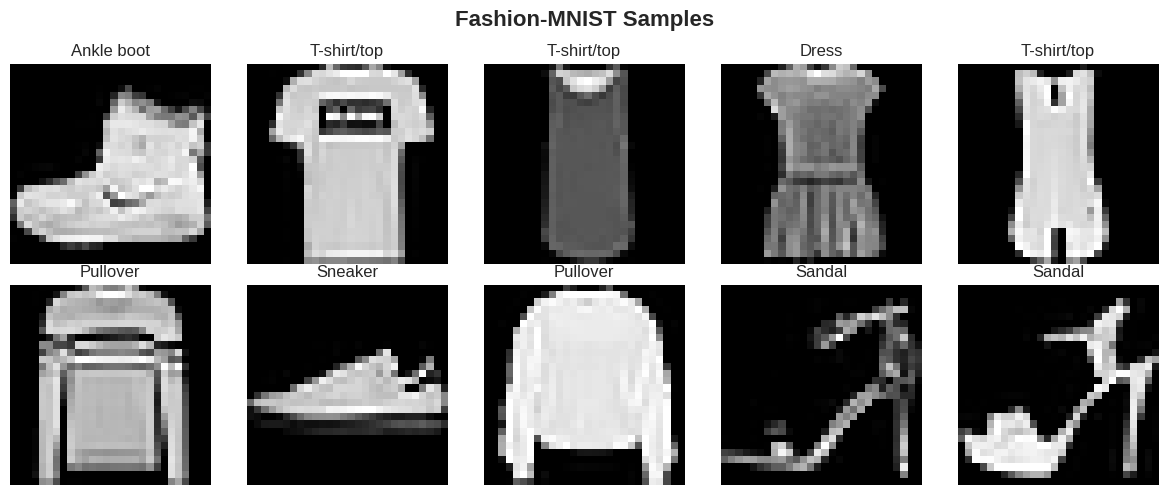

In [14]:
# Fashion-MNIST class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize samples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Fashion-MNIST Samples', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    image, label = train_dataset[i]
    # Convert from [C, H, W] to [H, W] for grayscale
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'{class_names[label]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### DataLoader - Batching and Shuffling

`DataLoader` handles batching, shuffling, and parallel loading:

In [15]:
# Create DataLoaders
batch_size = 64

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # Shuffle training data
    num_workers=0  # 0 for single-process (safer for notebooks)
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,  # Don't shuffle test data
    num_workers=0
)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")
print(f"Batch size: {batch_size}")

Number of training batches: 938
Number of test batches: 157
Batch size: 64


In [16]:
# Inspect a batch
images, labels = next(iter(train_loader))

print(f"Batch images shape: {images.shape}")  # [batch_size, channels, height, width]
print(f"Batch labels shape: {labels.shape}")  # [batch_size]
print(f"\nImage dtype: {images.dtype}")
print(f"Label dtype: {labels.dtype}")
print(f"\nImage range: [{images.min():.2f}, {images.max():.2f}]")

Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])

Image dtype: torch.float32
Label dtype: torch.int64

Image range: [-1.00, 1.00]


### Custom Dataset Example

In [17]:
# Load Iris dataset for binary classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

# Binary classification: Setosa (0) vs Not Setosa (1)
y_binary = (y != 0).astype(np.int64)

# Split data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

# Normalize
scaler = StandardScaler()
X_train_iris = scaler.fit_transform(X_train_iris)
X_test_iris = scaler.transform(X_test_iris)

print(f"Iris dataset loaded")
print(f"Training samples: {len(X_train_iris)}")
print(f"Test samples: {len(X_test_iris)}")
print(f"Features: {X_train_iris.shape[1]}")

Iris dataset loaded
Training samples: 120
Test samples: 30
Features: 4


In [18]:
# Convert to PyTorch tensors and create TensorDataset
X_train_tensor = torch.FloatTensor(X_train_iris)
y_train_tensor = torch.FloatTensor(y_train_iris).unsqueeze(1)  # Add dimension
X_test_tensor = torch.FloatTensor(X_test_iris)
y_test_tensor = torch.FloatTensor(y_test_iris).unsqueeze(1)

# Create datasets
iris_train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
iris_test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create dataloaders
iris_train_loader = DataLoader(iris_train_dataset, batch_size=16, shuffle=True)
iris_test_loader = DataLoader(iris_test_dataset, batch_size=16, shuffle=False)

print("✓ Iris DataLoaders created!")

✓ Iris DataLoaders created!


---
## Section 4: Building Your First Model

In PyTorch, we build models by subclassing `nn.Module`.

### Understanding nn.Module

Every PyTorch model inherits from `nn.Module` and must implement:
1. `__init__`: Define layers
2. `forward`: Define forward pass

In [21]:
# Simple binary classifier
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_size, 16)  # First hidden layer
        self.fc2 = nn.Linear(16, 8)           # Second hidden layer
        self.fc3 = nn.Linear(8, 1)            # Output layer

    def forward(self, x):
        # Define forward pass
        x = F.relu(self.fc1(x))  # Apply ReLU activation
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid for binary classification
        return x

# Create model instance
model_binary = BinaryClassifier(input_size=4)
model_binary = model_binary.to(device)

print(model_binary)
print(f"\n✓ Model created and moved to {device}")

BinaryClassifier(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)

✓ Model created and moved to cpu


In [20]:
# Count parameters
total_params = sum(p.numel() for p in model_binary.parameters())
trainable_params = sum(p.numel() for p in model_binary.parameters() if p.requires_grad)

print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

print("\nParameter breakdown:")
for name, param in model_binary.named_parameters():
    print(f"  {name}: {param.shape} = {param.numel():,} params")

Total parameters: 225
Trainable parameters: 225

Parameter breakdown:
  fc1.weight: torch.Size([16, 4]) = 64 params
  fc1.bias: torch.Size([16]) = 16 params
  fc2.weight: torch.Size([8, 16]) = 128 params
  fc2.bias: torch.Size([8]) = 8 params
  fc3.weight: torch.Size([1, 8]) = 8 params
  fc3.bias: torch.Size([1]) = 1 params


### Test Forward Pass

In [22]:
# Create dummy input
dummy_input = torch.randn(1, 4).to(device)  # 1 sample, 4 features
print(f"Input shape: {dummy_input.shape}")

# Forward pass
output = model_binary(dummy_input)
print(f"Output shape: {output.shape}")
print(f"Output value: {output.item():.4f}")

print("\n✓ Forward pass successful!")

Input shape: torch.Size([1, 4])
Output shape: torch.Size([1, 1])
Output value: 0.5337

✓ Forward pass successful!


### Alternative: Using nn.Sequential

In [23]:
# Sequential model (simpler for linear architectures)
model_sequential = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
).to(device)

print(model_sequential)
print("\n💡 nn.Sequential is simpler but less flexible than nn.Module")

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)

💡 nn.Sequential is simpler but less flexible than nn.Module


---
## Section 5: Loss Functions & Optimizers

Now we need to define how to optimize our model.

### Loss Functions

Choose based on your task:

| Task | Loss Function |
|------|---------------|
| Binary Classification | `nn.BCELoss()` or `nn.BCEWithLogitsLoss()` |
| Multi-class Classification | `nn.CrossEntropyLoss()` |
| Regression | `nn.MSELoss()` or `nn.L1Loss()` |

In [24]:
# Binary classification loss
criterion_binary = nn.BCELoss()  # Binary Cross Entropy

# Multi-class classification loss
criterion_multiclass = nn.CrossEntropyLoss()

# Regression loss
criterion_regression = nn.MSELoss()  # Mean Squared Error

print("Loss functions defined:")
print(f"  Binary: {criterion_binary}")
print(f"  Multi-class: {criterion_multiclass}")
print(f"  Regression: {criterion_regression}")

Loss functions defined:
  Binary: BCELoss()
  Multi-class: CrossEntropyLoss()
  Regression: MSELoss()


### Optimizers

Optimizers update model parameters to minimize loss.

In [26]:
# Common optimizers

# Adam (most popular)
optimizer_adam = optim.Adam(model_binary.parameters(), lr=0.001)

# SGD (classic)
optimizer_sgd = optim.SGD(model_binary.parameters(), lr=0.01, momentum=0.9)

# RMSprop
optimizer_rmsprop = optim.RMSprop(model_binary.parameters(), lr=0.001)

print("Optimizers:")
print(f"  Adam: {optimizer_adam}")
print(f"  SGD: {optimizer_sgd}")
print(f"  RMSprop: {optimizer_rmsprop}")

print("\n💡 For beginners, use Adam with lr=0.0001")

Optimizers:
  Adam: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
  SGD: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
  RMSprop: RMSprop (
Parameter Group 0
    alpha: 0.99
    capturable: False
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)

💡 For beginners, use Adam with lr=0.0001


### Understanding Learning Rate

In [27]:
# Example: Different learning rates
lr_values = [0.0001, 0.001, 0.01, 0.1]

print("Learning rate guidelines:")
for lr in lr_values:
    if lr <= 0.001:
        comment = "Safe, might be slow"
    elif lr <= 0.01:
        comment = "Good starting point"
    else:
        comment = "Might be too high, check for instability"
    print(f"  lr={lr}: {comment}")

print("\n💡 Start with 0.001 and adjust if needed")

Learning rate guidelines:
  lr=0.0001: Safe, might be slow
  lr=0.001: Safe, might be slow
  lr=0.01: Good starting point
  lr=0.1: Might be too high, check for instability

💡 Start with 0.001 and adjust if needed


---
## Section 6: The Training Loop

Unlike Keras, PyTorch requires you to write the training loop manually. This gives more control!

### Training Loop Structure

A typical training loop:
1. Set model to training mode
2. For each batch:
   - Zero gradients
   - Forward pass
   - Compute loss
   - Backward pass
   - Update weights

In [28]:
# Setup for binary classification
model_binary = BinaryClassifier(input_size=4).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_binary.parameters(), lr=0.001)

print("✓ Model, loss, and optimizer ready for training")

✓ Model, loss, and optimizer ready for training


In [29]:
# Training function
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()  # Set to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        # Move to device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Track statistics
        running_loss += loss.item() * inputs.size(0)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

print("✓ Training function defined")

✓ Training function defined


In [ ]:
# Validation function
def validate(model, dataloader, criterion, device):
    model.eval()  # Set to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation please note it
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

print("✓ Validation function defined")

In [ ]:
# Training loop
num_epochs = 50
train_losses = []
val_losses = []
train_accs = []
val_accs = []

print("Training binary classifier on Iris dataset...\n")

for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_epoch(
        model_binary, iris_train_loader, criterion, optimizer, device
    )

    # Validate
    val_loss, val_acc = validate(
        model_binary, iris_test_loader, criterion, device
    )

    # Save history
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

print("\n✓ Training complete!")

In [ ]:
# Visualize training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss
ax1.plot(train_losses, label='Training Loss', linewidth=2)
ax1.plot(val_losses, label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Binary Classifier Loss', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy
ax2.plot(train_accs, label='Training Accuracy', linewidth=2)
ax2.plot(val_accs, label='Validation Accuracy', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Binary Classifier Accuracy', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Understanding Each Step

**`optimizer.zero_grad()`**: Clear old gradients (they accumulate by default)

**`loss.backward()`**: Compute gradients via backpropagation

**`optimizer.step()`**: Update parameters using gradients

**`model.train()` vs `model.eval()`**: Affects Dropout and BatchNorm behavior

**`torch.no_grad()`**: Disables gradient computation (saves memory during evaluation)

---
## Section 7: Model Evaluation

Let's properly evaluate our binary classifier.

In [ ]:
# Evaluate on test set
model_binary.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in iris_test_loader:
        inputs = inputs.to(device)
        outputs = model_binary(inputs)
        predictions = (outputs > 0.5).float().cpu()

        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

all_predictions = np.array(all_predictions).flatten()
all_labels = np.array(all_labels).flatten()

print(f"Test Accuracy: {(all_predictions == all_labels).mean():.4f}")

In [ ]:
# Confusion matrix and metrics
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix - Binary Classification', fontsize=14, fontweight='bold')
plt.show()

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions,
                          target_names=['Setosa', 'Not Setosa']))

### Making Predictions on New Data

In [ ]:
# Single sample prediction
model_binary.eval()
sample = X_test_tensor[0:1].to(device)

with torch.no_grad():
    output = model_binary(sample)
    probability = output.item()
    prediction = int(probability > 0.5)

print(f"Sample features: {sample.cpu().numpy()[0]}")
print(f"\nPredicted probability: {probability:.4f}")
print(f"Predicted class: {prediction} ({'Not Setosa' if prediction else 'Setosa'})")
print(f"Actual class: {int(y_test_tensor[0].item())} ({'Not Setosa' if int(y_test_tensor[0].item()) else 'Setosa'})")

---
## Section 8: Common Layers & Techniques

Let's explore important layers and regularization techniques.

### Activation Functions

In [ ]:
# Visualize activation functions
x = np.linspace(-5, 5, 100)
x_tensor = torch.tensor(x, dtype=torch.float32)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ReLU
relu_output = F.relu(x_tensor).numpy()
axes[0, 0].plot(x, relu_output, linewidth=2)
axes[0, 0].set_title('ReLU', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color='k', linewidth=0.5)
axes[0, 0].axvline(x=0, color='k', linewidth=0.5)

# Sigmoid
sigmoid_output = torch.sigmoid(x_tensor).numpy()
axes[0, 1].plot(x, sigmoid_output, linewidth=2)
axes[0, 1].set_title('Sigmoid', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0.5, color='r', linewidth=0.5, linestyle='--')

# Tanh
tanh_output = torch.tanh(x_tensor).numpy()
axes[1, 0].plot(x, tanh_output, linewidth=2)
axes[1, 0].set_title('Tanh', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='k', linewidth=0.5)

# LeakyReLU
leaky_relu_output = F.leaky_relu(x_tensor, negative_slope=0.01).numpy()
axes[1, 1].plot(x, leaky_relu_output, linewidth=2)
axes[1, 1].set_title('LeakyReLU', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='k', linewidth=0.5)
axes[1, 1].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print("💡 ReLU is the default choice for hidden layers")

### Dropout Layer

In [ ]:
# Model with Dropout
class ModelWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ModelWithDropout, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(0.3)  # Drop 30% of neurons
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(hidden_size // 2, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)  # Only active during training
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

model_dropout = ModelWithDropout(784, 256, 10)
print(model_dropout)
print("\n💡 Dropout is automatically disabled in eval() mode")

### Batch Normalization

In [ ]:
# Model with Batch Normalization
class ModelWithBatchNorm(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ModelWithBatchNorm, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.bn2 = nn.BatchNorm1d(hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)  # Normalize
        x = F.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

model_bn = ModelWithBatchNorm(784, 256, 10)
print(model_bn)
print("\n💡 BatchNorm normalizes activations, making training faster")

### Combining Techniques

In [ ]:
# Advanced model combining multiple techniques
class AdvancedModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(AdvancedModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.2)

        self.fc4 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        x = F.relu(self.fc3(x))
        x = self.dropout3(x)

        x = self.fc4(x)
        return x

advanced_model = AdvancedModel(784, 10)
print(advanced_model)
print("\n✓ This model combines BatchNorm, Dropout, and ReLU")

---
## Section 9: Complete Project - Multi-Class Classification

Let's build a complete Fashion-MNIST classifier from scratch!

In [ ]:
# Define the Fashion-MNIST classifier
class FashionMNISTClassifier(nn.Module):
    def __init__(self):
        super(FashionMNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.2)

        self.fc4 = nn.Linear(64, 10)  # 10 classes

    def forward(self, x):
        # Flatten input
        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        x = F.relu(self.fc3(x))
        x = self.dropout3(x)

        x = self.fc4(x)
        return x  # No softmax (CrossEntropyLoss includes it)

# Create model
fashion_model = FashionMNISTClassifier().to(device)
print(fashion_model)

# Count parameters
total_params = sum(p.numel() for p in fashion_model.parameters())
print(f"\nTotal parameters: {total_params:,}")

In [ ]:
# Setup training
criterion_fashion = nn.CrossEntropyLoss()
optimizer_fashion = optim.Adam(fashion_model.parameters(), lr=0.001)

print("✓ Ready for training!")
print(f"  Loss: CrossEntropyLoss")
print(f"  Optimizer: Adam (lr=0.001)")
print(f"  Device: {device}")

In [ ]:
# Training functions for multi-class classification
def train_epoch_multiclass(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return running_loss / total, correct / total

def validate_multiclass(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return running_loss / total, correct / total

print("✓ Training functions ready")

In [ ]:
# Train the model
num_epochs = 15
train_losses_fashion = []
val_losses_fashion = []
train_accs_fashion = []
val_accs_fashion = []

print("Training Fashion-MNIST classifier...\n")

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch_multiclass(
        fashion_model, train_loader, criterion_fashion, optimizer_fashion, device
    )

    val_loss, val_acc = validate_multiclass(
        fashion_model, test_loader, criterion_fashion, device
    )

    train_losses_fashion.append(train_loss)
    val_losses_fashion.append(val_loss)
    train_accs_fashion.append(train_acc)
    val_accs_fashion.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

print("\n✓ Training complete!")

In [ ]:
# Visualize training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(train_losses_fashion, label='Training Loss', linewidth=2)
ax1.plot(val_losses_fashion, label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Fashion-MNIST Model Loss', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(train_accs_fashion, label='Training Accuracy', linewidth=2)
ax2.plot(val_accs_fashion, label='Validation Accuracy', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Fashion-MNIST Model Accuracy', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final Test Accuracy: {val_accs_fashion[-1]:.4f} ({val_accs_fashion[-1]*100:.2f}%)")

In [ ]:
# Collect all predictions for analysis
fashion_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = fashion_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

print("✓ Predictions collected")

In [ ]:
# Visualize predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Fashion-MNIST Predictions', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    image, label = test_dataset[i]
    ax.imshow(image.squeeze(), cmap='gray')

    color = 'green' if all_preds[i] == all_labels[i] else 'red'
    ax.set_title(f'Pred: {class_names[all_preds[i]]}\nTrue: {class_names[all_labels[i]]}',
                color=color, fontsize=9, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Fashion-MNIST Confusion Matrix', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Detailed classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

---
## Section 10: Regression with ANNs

Now let's tackle regression - predicting continuous values.

In [ ]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target

print("California Housing Dataset")
print(f"Samples: {X_housing.shape[0]}")
print(f"Features: {X_housing.shape[1]}")
print(f"\nFeatures: {housing.feature_names}")
print(f"\nTarget: Median house value (in $100k)")
print(f"Range: ${y_housing.min()*100000:.0f} - ${y_housing.max()*100000:.0f}")

In [ ]:
# Prepare data
from sklearn.preprocessing import StandardScaler

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

# Scale features
scaler_h = StandardScaler()
X_train_h = scaler_h.fit_transform(X_train_h)
X_test_h = scaler_h.transform(X_test_h)

# Convert to tensors
X_train_h_tensor = torch.FloatTensor(X_train_h)
y_train_h_tensor = torch.FloatTensor(y_train_h).unsqueeze(1)
X_test_h_tensor = torch.FloatTensor(X_test_h)
y_test_h_tensor = torch.FloatTensor(y_test_h).unsqueeze(1)

# Create datasets and loaders
train_dataset_h = TensorDataset(X_train_h_tensor, y_train_h_tensor)
test_dataset_h = TensorDataset(X_test_h_tensor, y_test_h_tensor)

train_loader_h = DataLoader(train_dataset_h, batch_size=32, shuffle=True)
test_loader_h = DataLoader(test_dataset_h, batch_size=32, shuffle=False)

print("✓ Data prepared for regression")

In [ ]:
# Regression model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)  # Single output for regression

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)  # No activation for regression
        return x

regression_model = RegressionModel(input_size=8).to(device)
print(regression_model)

print("\n💡 Key differences from classification:")
print("  - 1 output neuron (not multiple classes)")
print("  - No activation on output (linear)")
print("  - MSE loss (not CrossEntropy)")

In [ ]:
# Setup for regression
criterion_reg = nn.MSELoss()
optimizer_reg = optim.Adam(regression_model.parameters(), lr=0.001)

print("✓ Regression setup complete")
print(f"  Loss: MSE")
print(f"  Optimizer: Adam")

In [ ]:
# Training functions for regression
def train_epoch_regression(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    running_mae = 0.0
    total = 0

    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_mae += torch.abs(outputs - targets).sum().item()
        total += inputs.size(0)

    return running_loss / total, running_mae / total

def validate_regression(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_mae = 0.0
    total = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item() * inputs.size(0)
            running_mae += torch.abs(outputs - targets).sum().item()
            total += inputs.size(0)

    return running_loss / total, running_mae / total

print("✓ Training functions ready")

In [ ]:
# Train regression model
num_epochs = 100
train_losses_reg = []
val_losses_reg = []
train_maes_reg = []
val_maes_reg = []

print("Training regression model...\n")

for epoch in range(num_epochs):
    train_loss, train_mae = train_epoch_regression(
        regression_model, train_loader_h, criterion_reg, optimizer_reg, device
    )
    val_loss, val_mae = validate_regression(
        regression_model, test_loader_h, criterion_reg, device
    )

    train_losses_reg.append(train_loss)
    val_losses_reg.append(val_loss)
    train_maes_reg.append(train_mae)
    val_maes_reg.append(val_mae)

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"  Train MSE: {train_loss:.4f}, MAE: {train_mae:.4f}")
        print(f"  Val MSE: {val_loss:.4f}, MAE: {val_mae:.4f}")

print("\n✓ Training complete!")

In [ ]:
# Visualize training
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(train_losses_reg, label='Training MSE', linewidth=2)
ax1.plot(val_losses_reg, label='Validation MSE', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('MSE', fontsize=12)
ax1.set_title('Regression Model MSE', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(train_maes_reg, label='Training MAE', linewidth=2)
ax2.plot(val_maes_reg, label='Validation MAE', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('MAE', fontsize=12)
ax2.set_title('Regression Model MAE', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions
regression_model.eval()
all_predictions_reg = []
all_targets_reg = []

with torch.no_grad():
    for inputs, targets in test_loader_h:
        inputs = inputs.to(device)
        outputs = regression_model(inputs)
        all_predictions_reg.extend(outputs.cpu().numpy())
        all_targets_reg.extend(targets.numpy())

all_predictions_reg = np.array(all_predictions_reg).flatten()
all_targets_reg = np.array(all_targets_reg).flatten()

# Calculate R²
from sklearn.metrics import r2_score
r2 = r2_score(all_targets_reg, all_predictions_reg)

print(f"Test MSE: {val_losses_reg[-1]:.4f}")
print(f"Test MAE: {val_maes_reg[-1]:.4f} (${val_maes_reg[-1]*100000:.0f})")
print(f"Test RMSE: {np.sqrt(val_losses_reg[-1]):.4f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# Visualize predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Predictions vs Actual
ax1.scatter(all_targets_reg, all_predictions_reg, alpha=0.5, s=20)
ax1.plot([all_targets_reg.min(), all_targets_reg.max()],
         [all_targets_reg.min(), all_targets_reg.max()],
         'r--', linewidth=2, label='Perfect predictions')
ax1.set_xlabel('Actual Price ($100k)', fontsize=12)
ax1.set_ylabel('Predicted Price ($100k)', fontsize=12)
ax1.set_title(f'Predictions vs Actual (R²={r2:.3f})', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Residuals
residuals = all_targets_reg - all_predictions_reg
ax2.scatter(all_predictions_reg, residuals, alpha=0.5, s=20)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted Price ($100k)', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_title('Residual Plot', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## Section 11: Advanced Training Techniques

Let's explore some advanced training techniques.

### Learning Rate Scheduling

In [ ]:
# Learning rate schedulers
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau, CosineAnnealingLR

# Example model and optimizer
dummy_model = nn.Linear(10, 1)
dummy_optimizer = optim.Adam(dummy_model.parameters(), lr=0.001)

# StepLR: Reduce LR by factor every N epochs
scheduler_step = StepLR(dummy_optimizer, step_size=10, gamma=0.1)

# ReduceLROnPlateau: Reduce when metric plateaus
scheduler_plateau = ReduceLROnPlateau(dummy_optimizer, mode='min',
                                     factor=0.5, patience=5)

# CosineAnnealing: Cosine annealing schedule
scheduler_cosine = CosineAnnealingLR(dummy_optimizer, T_max=50)

print("Learning rate schedulers:")
print(f"  StepLR: {scheduler_step}")
print(f"  ReduceLROnPlateau: {scheduler_plateau}")
print(f"  CosineAnnealingLR: {scheduler_cosine}")

print("\n💡 Usage in training loop:")
print("  scheduler.step() after each epoch (StepLR, Cosine)")
print("  scheduler.step(val_loss) for ReduceLROnPlateau")

### Gradient Clipping

In [ ]:
# Gradient clipping prevents exploding gradients
# Add this in your training loop:

def train_with_clipping(model, dataloader, criterion, optimizer, device, max_norm=1.0):
    model.train()

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Clip gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)

        optimizer.step()

print("✓ Gradient clipping example defined")
print("\n💡 Use when gradients explode (loss becomes NaN)")

### Custom Training Loops with Logging

In [ ]:
# Advanced training loop with more features
from tqdm import tqdm

def advanced_train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    # Progress bar
    pbar = tqdm(dataloader, desc='Training')

    for inputs, labels in pbar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pbar.set_postfix({'loss': loss.item()})

    return running_loss / len(dataloader)

print("✓ Advanced training loop with progress bar defined")

---
## Section 12: Saving & Loading Models

PyTorch provides flexible options for saving models.

### Method 1: Save State Dict (Recommended)

In [ ]:
# Save model state dict
torch.save(fashion_model.state_dict(), 'fashion_model.pth')
print("✓ Model state dict saved as 'fashion_model.pth'")

# Save with additional information
checkpoint = {
    'epoch': num_epochs,
    'model_state_dict': fashion_model.state_dict(),
    'optimizer_state_dict': optimizer_fashion.state_dict(),
    'loss': val_losses_fashion[-1],
}
torch.save(checkpoint, 'fashion_checkpoint.pth')
print("✓ Checkpoint saved as 'fashion_checkpoint.pth'")

print("\n💡 .pth is the standard PyTorch model extension")

In [ ]:
# Load model state dict
loaded_model = FashionMNISTClassifier().to(device)
loaded_model.load_state_dict(torch.load('fashion_model.pth', map_location=device))
loaded_model.eval()

print("✓ Model loaded successfully!")

# Verify it works
val_loss, val_acc = validate_multiclass(
    loaded_model, test_loader, criterion_fashion, device
)
print(f"Loaded model accuracy: {val_acc:.4f}")

In [ ]:
# Load checkpoint
checkpoint_loaded = torch.load('fashion_checkpoint.pth', map_location=device)

new_model = FashionMNISTClassifier().to(device)
new_optimizer = optim.Adam(new_model.parameters())

new_model.load_state_dict(checkpoint_loaded['model_state_dict'])
new_optimizer.load_state_dict(checkpoint_loaded['optimizer_state_dict'])
epoch = checkpoint_loaded['epoch']
loss = checkpoint_loaded['loss']

print(f"Checkpoint loaded from epoch {epoch}")
print(f"Previous loss: {loss:.4f}")
print("\n✓ You can continue training from this point!")

### Method 2: Save Entire Model

In [ ]:
# Save entire model (less flexible)
torch.save(regression_model, 'regression_model_full.pth')
print("✓ Entire model saved")

# Load entire model
loaded_full = torch.load('regression_model_full.pth', map_location=device, weights_only=False)
loaded_full.eval()

print("✓ Full model loaded")
print("\n⚠️  Warning: This approach is less flexible")
print("   Prefer saving state_dict for production")

In [ ]:
# Method 1: Save State Dict (Recommended for Production)

# Save model state_dict
torch.save(regression_model.state_dict(), 'regression_model_state_dict.pth')
print("✓ Model state_dict saved")

# Load model state_dict
# First, you need to recreate the model architecture
loaded_model = RegressionModel(input_size=8)  # Instantiate your model class with the correct input_size
loaded_model.load_state_dict(torch.load('regression_model_state_dict.pth',
                                        map_location=device))
loaded_model.eval()

print("✓ Model state_dict loaded")
print("✅ This is the preferred approach for production")

### Best Practices

In [ ]:
print("Best Practices for Model Saving:")
print("\n1. Save state_dict, not entire model")
print("   - More flexible")
print("   - Smaller file size")
print("   - Works across PyTorch versions")
print("\n2. Include metadata in checkpoint")
print("   - Epoch number")
print("   - Optimizer state")
print("   - Best metrics")
print("\n3. Use map_location when loading")
print("   - Prevents errors when GPU availability changes")
print("\n4. Call model.eval() after loading")
print("   - Disables dropout and batch norm training mode")

---
## Section 13: Best Practices & Tips

Let's wrap up with important best practices and debugging tips.

### Device Management

In [ ]:
# Good practice: Define device at the start
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to device
model = FashionMNISTClassifier().to(device)

# Always move data to same device as model
# inputs, labels = inputs.to(device), labels.to(device)

print("✓ Device management tips:")
print("  1. Define device once at start")
print("  2. Move model with .to(device)")
print("  3. Move data in training loop")
print("  4. Use map_location when loading")

### Memory Management

In [ ]:
print("Memory Management Tips:")
print("\n1. Use torch.no_grad() during evaluation")
print("   - Disables gradient computation")
print("   - Saves memory and speeds up inference")
print("\n2. Delete unused variables")
print("   - del large_tensor")
print("   - torch.cuda.empty_cache() (GPU)")
print("\n3. Use smaller batch sizes if OOM")
print("   - Reduce batch_size in DataLoader")
print("\n4. Move tensors to CPU when done")
print("   - tensor.cpu() frees GPU memory")

### Common Errors and Solutions

In [ ]:
print("Common PyTorch Errors:\n")

print("1. RuntimeError: Expected tensor on cuda but got cpu")
print("   Solution: Ensure model and data are on same device")
print("   Fix: inputs = inputs.to(device)\n")

print("2. RuntimeError: size mismatch")
print("   Solution: Check input/output dimensions")
print("   Debug: print(tensor.shape) at each layer\n")

print("3. Loss is NaN")
print("   Solutions:")
print("   - Lower learning rate")
print("   - Use gradient clipping")
print("   - Check for inf/nan in data\n")

print("4. CUDA out of memory")
print("   Solutions:")
print("   - Reduce batch_size")
print("   - Use torch.cuda.empty_cache()")
print("   - Use gradient accumulation\n")

print("5. Model not learning (loss not decreasing)")
print("   Solutions:")
print("   - Check learning rate (try higher)")
print("   - Verify data normalization")
print("   - Check loss function matches task")
print("   - Ensure optimizer.zero_grad() is called")

### PyTorch vs Keras Comparison

In [ ]:
print("PyTorch vs Keras:\n")

print("PyTorch Advantages:")
print("  ✓ More explicit and transparent")
print("  ✓ Better for research and custom architectures")
print("  ✓ Dynamic computation graphs")
print("  ✓ More Pythonic")
print("  ✓ Better debugging")

print("\nKeras Advantages:")
print("  ✓ Simpler, more beginner-friendly")
print("  ✓ Less boilerplate code")
print("  ✓ Faster prototyping")
print("  ✓ Built-in training loop")
print("  ✓ Excellent for standard architectures")

print("\nWhen to use which:")
print("  - PyTorch: Research, custom models, need control")
print("  - Keras: Quick prototyping, standard models, beginners")
print("\n💡 Both are excellent - choose based on your needs!")

### Quick Reference

In [ ]:
print("PyTorch Quick Reference:\n")

print("Model Definition:")
print("  class Model(nn.Module):")
print("      def __init__(self): ...")
print("      def forward(self, x): ...\n")

print("Training Loop:")
print("  model.train()")
print("  optimizer.zero_grad()")
print("  outputs = model(inputs)")
print("  loss = criterion(outputs, labels)")
print("  loss.backward()")
print("  optimizer.step()\n")

print("Evaluation:")
print("  model.eval()")
print("  with torch.no_grad():")
print("      outputs = model(inputs)\n")

print("Save/Load:")
print("  torch.save(model.state_dict(), 'model.pth')")
print("  model.load_state_dict(torch.load('model.pth'))")

---
## Congratulations! 🔥

You've completed the PyTorch ANN tutorial! You now know how to:

✅ Work with PyTorch tensors and autograd  
✅ Build neural networks using nn.Module  
✅ Create custom training and evaluation loops  
✅ Use DataLoader for efficient data handling  
✅ Train models for classification and regression  
✅ Apply Dropout and Batch Normalization  
✅ Optimize with different optimizers and schedulers  
✅ Save and load models  
✅ Debug common errors  
✅ Understand PyTorch vs Keras tradeoffs  

### Next Steps

1. Compare this notebook with the Keras tutorial
2. Experiment with different architectures and hyperparameters
3. Try custom datasets
4. Learn about Convolutional Neural Networks (CNNs)
5. Explore Recurrent Neural Networks (RNNs)
6. Dive into Transfer Learning

### Resources

- [PyTorch Documentation](https://pytorch.org/docs/)
- [PyTorch Tutorials](https://pytorch.org/tutorials/)
- [Deep Learning with PyTorch Book](https://pytorch.org/deep-learning-with-pytorch)

Keep building and experimenting! 🚀